In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import scienceplots
plt.style.use(['science','grid','no-latex'])

gal_lon,gal_lat,Temperature,cos_theta,sigma=np.loadtxt('final-data.csv',delimiter=',',unpack=True)
z=np.loadtxt('/home/soumadip/Desktop/data.csv',delimiter=',')

ValueError: could not convert string '' to float64 at row 0, column 1.

In [2]:
from scipy.constants import h,c,k

In [3]:
velo=np.linspace(300*1e3,400*1e3,num=1000)

In [4]:
sigma=sigma/0.000196

In [5]:
sigma

array([0.95924505, 0.58117894, 0.64015598, ..., 0.57902742, 0.38155383,
       0.54067928])

In [6]:
beta=velo/c
Temperature = Temperature

In [7]:

v=np.linspace(370*1e3,410*1e3,num=500)
chisq=np.zeros(500)
for j in range(500):
    t=Temperature - (2.727780*(1+(v[j]*cos_theta)/c))
    chisq[j]=np.sum((t/sigma)**2)

In [8]:
def root_mean_square(input): # function to find rms of the data
    
    input=np.array(input)
    squared_input=input**2
    mean=np.mean(squared_input)

    return np.sqrt(mean)

root_mean_square(Temperature)
root_mean_square(sigma)

0.9980749444285494

In [9]:
def std_dev(mean,input):
    cd=(input-mean)**2
    ce=np.sum(cd)/len(input)
    return np.sqrt(ce)

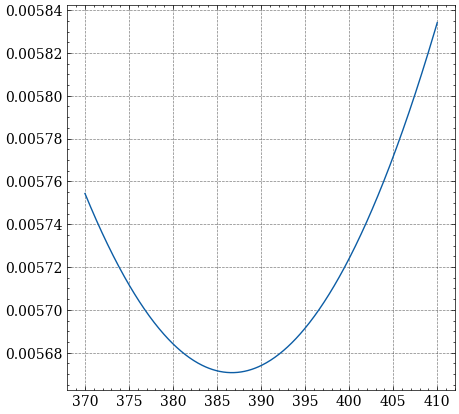

In [10]:
plt.figure(figsize=(5,5))
plt.plot(np.array(v)/1e3,chisq)

In [28]:
t=np.linspace(2.721,2.729,100)
v=np.linspace(370*1e3,410*1e3,100)
x,y=np.meshgrid(t,v)

In [12]:
'''t=np.linspace(-3,3,100)
v=np.linspace(-3,3,100)
x,y=np.meshgrid(t,v)
'''

't=np.linspace(-3,3,100)\nv=np.linspace(-3,3,100)\nx,y=np.meshgrid(t,v)\n'

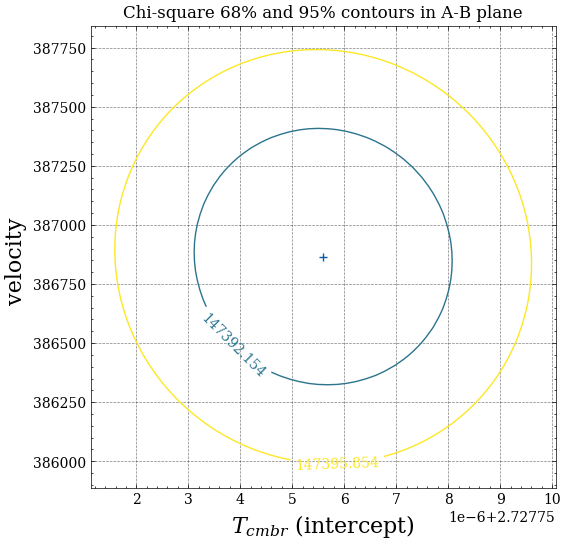

In [38]:
import matplotlib.pyplot as plt
from numpy import *
import numpy as np
import pandas as pd
from scipy.constants import c
# data input
gal_lon,gal_lat,Temperature,cos_theta,sigma=np.loadtxt('/home/soumadip/Documents/Motion-of-solar-system/Code/final-data.csv',delimiter=',',unpack=True)
y = Temperature 
x = 2.727755*cos_theta/c
yerr= sigma
# calculate sums needed to obtain chi-square
s_yy=sum (y**2/yerr**2)
s_xx=sum(x**2/yerr**2)
s_0=sum(1/yerr**2)
s_xy=sum( (y*x) /yerr**2)
s_y=sum(y/yerr**2)
s_x=sum(x/yerr**2)
# by completing the square, we rewrite chi-squared as
# sum((y_i - A x_i - B)*2/sigma_i*2
# = (A-A**)*2/sigma_A*2
# + (B-B**) *2/sigma_B*2
# + 2*rho* (A-A**) (B-B**) /sigma_A*Sigma_A
# + \chi*2_{min}
A_best = (s_0*s_xy - s_x*s_y)/(s_0*s_xx - s_x**2)
sigma_A = 1/sqrt(s_xx);
B_best = (s_y*s_xx - s_x*s_xy)/(s_0*s_xx - s_x**2)
sigma_B = 1/sqrt(s_0);
rho = s_x/sqrt(s_xx*s_0);
minchi2 = (s_0*s_xy**2 - 2*s_x*s_y*s_xy + s_y**2*s_xx)/(s_x**2 - \
s_0*s_xx) + s_yy
# create parameter grid
A_interval = 1.1* (sqrt (6.17*sigma_A**2/(1-rho**2)));
B_interval = 1.1* (sqrt (6.17*sigma_B**2/(1-rho**2)));

# create parameter grid
a = np.linspace(A_best-A_interval, A_best+A_interval)
b = np.linspace(B_best-B_interval, B_best+B_interval)
A,B = np.meshgrid(a,b)
# calculate chi-square over parameter grid
# chi2=(S1)+ (A**2)*(S2) + (B**2)*(S3) - 2*A*S4 - 2*B*S5 + 2*A*B*S6
chi2 = s_yy + (A**2)*s_xx + (B**2)*s_0 - 2*A*s_xy - 2*B*s_y + 2*A*B*s_x;
# plot data with errorbars
'''
plt.figure (1)
plt.plot (x,A_best*x)
plt.errorbar (x,y, yerr, linestyle='None',fmt='.k')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.grid(True)
plt.title("y vs x data with y-error bars")
'''
#plot chi-square in A-~b parameter plane with 68% and 95% contours
plt.figure(figsize=(6,6))
levels= [minchi2,minchi2+2.3,minchi2+6]
Z=plt.contour(B,A,chi2,levels)
plt.clabel(Z,inline=1, fontsize=10)
plt.plot(B_best,A_best,'+')
plt.xlabel('$T_{cmbr}$ (intercept)',fontsize=16)
plt.ylabel('velocity ',fontsize=16)
plt.title('Chi-square 68% and 95% contours in A-B plane')
plt.show()

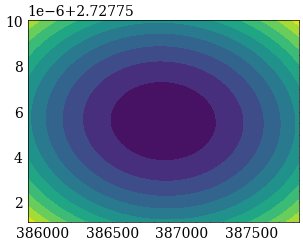

In [36]:
plt.contourf(A,B,chi2,levels=10)

In [29]:
z=np.zeros((100,100))
for i in range(100):
    chisq=np.zeros(100)
    for j in range(100):
        delT = Temperature - x[i]
        delT_T = delT/x[i]
        tk= delT_T - ((y[i]*cos_theta)/c)
        chisq[j]=np.sum((tk/sigma)**2)
    z[i]=chisq    

ValueError: operands could not be broadcast together with shapes (100,) (4005,) 

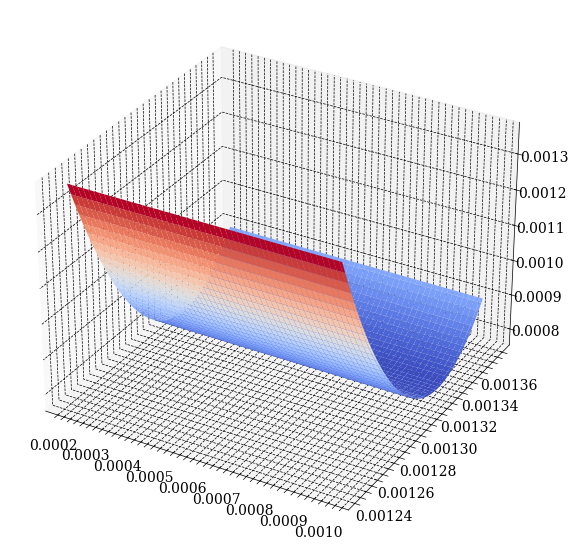

In [17]:
fig,ax=plt.subplots(subplot_kw={'projection':'3d'},figsize=(7,7))
ax.plot_surface(x,y/c,z,cmap='coolwarm')